In [22]:
import matplotlib
import numpy as np
import gym
import matplotlib.pyplot as plt
import random



In [23]:
policy = np.zeros([9, 6])
policy = [[-1, 1, -1, -1, -3, 50], 
     [1, 1, -1, 1, 5, -10], 
     [1, -1, -1, -1, 5, -10], 
     [-1, 1, -1, -1, 5, -10], 
     [1, 1, 1, 1, 5, -10], 
     [1, -1, -1, -1, 5, -10], 
     [-1, 1, -1, -1, 5, -10], 
     [1, 1, 1, -1, 5, -10], 
     [1, -1, -1, -1, 5, -10]]

In [24]:
class OfficeEnv(gym.Env):

    def __init__(self):
       
        self.action_space = 6
        self.state_space = 9
        self.observation_space = 72
        reward = 0
        state = random.randint(0,self.state_space-1)

    def step(self, action):

        
        state = random.randint(0,self.state_space-1)
        reward = policy[state][action]
            
        done = True

        info = {}

        return state, reward, done, info

    def reset(self):
        state = random.randint(0,env.state_space-1)
        reward = 0
        return state

In [25]:
env = OfficeEnv()

Episode 1000/1000. (0.0)

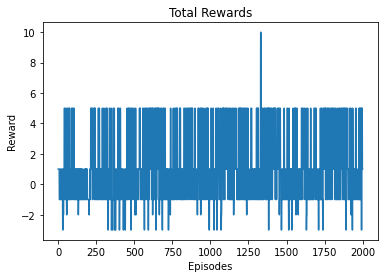

Algorithm took 3.195436477661133 to execute


In [61]:
import gym
import itertools
from collections import defaultdict
import numpy as np
import sys
import time
from multiprocessing.pool import ThreadPool as Pool



from collections import defaultdict

    
def make_epsilon_greedy_policy(Q, epsilon, nA):

    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

def sarsa_lambda(env, num_episodes, discount=0.9, alpha=0.01, trace_decay=0.9, epsilon=0.1, type='accumulate'):

    Q = defaultdict(lambda: np.zeros(6))
    E = defaultdict(lambda: np.zeros(6))

    policy = make_epsilon_greedy_policy(Q, epsilon, 6)

    rewards = [0.]
    r_vals = []
    for i_episode in range(num_episodes):

        print("\rEpisode {}/{}. ({})".format(i_episode+1, num_episodes, rewards[-1]), end="")
        sys.stdout.flush()

        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)

        for t in itertools.count():

            next_state, reward, done, _ = env.step(action)

            next_action_probs = policy(next_state)
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)

            delta = reward + discount*Q[next_state][next_action] - Q[state][action]

            #stats.episode_rewards[i_episode] += reward
            r_vals.append(reward)
            E[state][action] += 1

            for s, _ in Q.items():
                Q[s][:] += alpha * delta * E[s][:]
                if type == 'accumulate':
                    E[s][:] *= trace_decay * discount
                elif type == 'replace':
                    if s == state:
                        E[s][:] = 1
                    else:
                        E[s][:] *= discount * trace_decay

            if done:
                r_vals.append(reward)
                break

            state = next_state
            action = next_action
    plt.plot(r_vals)
    plt.title('Total Rewards')
    plt.ylabel('Reward')
    plt.xlabel('Episodes')
    plt.show()
    return Q


start = time.time()
Q = sarsa_lambda(env, 1000)
end = time.time()


Episode 1\1000Rewards:  1
Episode 2\1000Rewards:  -1
Episode 3\1000Rewards:  -1
Episode 4\1000Rewards:  1
Episode 5\1000Rewards:  1
Episode 6\1000Rewards:  -1
Episode 7\1000Rewards:  -3
Episode 8\1000Rewards:  -2
Episode 9\1000Rewards:  -1
Episode 10\1000Rewards:  1
Episode 11\1000Rewards:  1
Episode 12\1000Rewards:  -1
Episode 13\1000Rewards:  -1
Episode 14\1000Rewards:  1
Episode 15\1000Rewards:  1
Episode 16\1000Rewards:  1
Episode 17\1000Rewards:  -2
Episode 18\1000Rewards:  -2
Episode 19\1000Rewards:  1
Episode 20\1000Rewards:  5
Episode 21\1000Rewards:  5
Episode 22\1000Rewards:  1
Episode 23\1000Rewards:  -1
Episode 24\1000Rewards:  -1
Episode 25\1000Rewards:  -1
Episode 26\1000Rewards:  -1
Episode 27\1000Rewards:  1
Episode 28\1000Rewards:  5
Episode 29\1000Rewards:  5
Episode 30\1000Rewards:  -1
Episode 31\1000Rewards:  1
Episode 32\1000Rewards:  -1
Episode 33\1000Rewards:  10
Episode 34\1000Rewards:  -2
Episode 35\1000Rewards:  -1
Episode 36\1000Rewards:  1
Episode 37\1000Rew

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in add


Episode 330\1000Rewards:  -1
Episode 331\1000Rewards:  1
Episode 332\1000Rewards:  -1
Episode 333\1000Rewards:  1
Episode 334\1000Rewards:  1
Episode 335\1000Rewards:  1
Episode 336\1000Rewards:  -1
Episode 337\1000Rewards:  1
Episode 338\1000Rewards:  1
Episode 339\1000Rewards:  1
Episode 340\1000Rewards:  1
Episode 341\1000Rewards:  -1
Episode 342\1000Rewards:  1
Episode 343\1000Rewards:  1
Episode 344\1000Rewards:  1
Episode 345\1000Rewards:  1
Episode 346\1000Rewards:  -1
Episode 347\1000Rewards:  1
Episode 348\1000Rewards:  1
Episode 349\1000Rewards:  1
Episode 350\1000Rewards:  1
Episode 351\1000Rewards:  1
Episode 352\1000Rewards:  -1
Episode 353\1000Rewards:  1
Episode 354\1000Rewards:  1
Episode 355\1000Rewards:  1
Episode 356\1000Rewards:  1
Episode 357\1000Rewards:  -1
Episode 358\1000Rewards:  1
Episode 359\1000Rewards:  1
Episode 360\1000Rewards:  -1
Episode 361\1000Rewards:  -1
Episode 362\1000Rewards:  1
Episode 363\1000Rewards:  -1
Episode 364\1000Rewards:  1
Episode 36

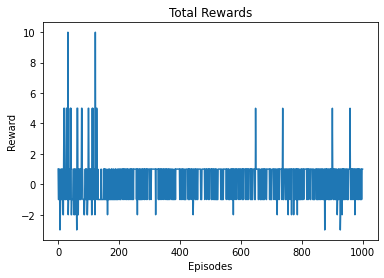

In [27]:
import random as rand
import numpy as np
import gym
import sys

class SarsaAgent:

    def __init__(self, stateSize, actions, explorationRate, stepSize, rewardDiscount):
        self.actions = np.array(actions)
        self.weights = np.zeros((len(actions), stateSize), dtype=np.float32)
        self.explorationRate = explorationRate
        self.stepSize = stepSize
        self.rewardDiscount = rewardDiscount

    def chooseAction(self, state):
        return self.__chooseActionInternal__(state)[1]

    def learn(self, state, action, newState, reward, done):
        prevQValue = self.__getQValue__(state, action)
        if done:
            step = self.stepSize * (reward - prevQValue)
        else:
            nextQValue = self.__chooseActionInternal__(newState)[0]
            step = self.stepSize * (reward + self.rewardDiscount * nextQValue - prevQValue)

        gradient = state
        self.weights[action] += step * gradient

    def __chooseActionInternal__(self, state):
        qValues = np.array([self.__getQValue__(state, action) for action in self.actions])
        if rand.random() < self.explorationRate:
            index = rand.choice(range(len(self.actions)))
        else:
            index = np.argmax(qValues)

        return (qValues[index], self.actions[index])

    def __getQValue__(self, state, action):
        return np.sum(state * self.weights[action])

def trainAgent(agent, episodes = 1):
    env = OfficeEnv()
    totalRewards = []
    for i in range(episodes):
        sys.stdout.write("\rEpisode {}\\{}".format(i + 1, episodes))
        state = env.reset()
        state = random.randint(0,env.state_space-1)
        totalReward = 0
        while True:
            action = agent.chooseAction(state)
            newState, reward, done, _ = env.step(action)
            newState = env.step(action)

            totalReward += reward
            agent.learn(state, action, newState, reward, done)

            if done:
                print("Rewards: ", totalReward)
                break

            state = newState

        totalRewards.append(totalReward)

    
  
    plt.plot(totalRewards)
    plt.title('Total Rewards')
    plt.ylabel('Reward')
    plt.xlabel('Episodes')
    plt.show()
    return totalRewards
agent = SarsaAgent(9, np.array([0, 1, 2, 3, 4, 5]), 0.1, 0.8, 1)
rewards = trainAgent(agent, 1000)

In [62]:
!apt-get update
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc --fix-missing
!pip install pypandoc

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:13 https://